In [1]:
import importlib
import pandas as pd
import numpy as np
import koopomics as ko


In [4]:
pregnancy_df = pd.read_csv('/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/input_data/pregnancy/pregnancy_interpolated_featselected30M_robustscaled.csv')

condition_id = 'Condition'
time_id = 'Gestational age (GA)/weeks'
replicate_id = 'Subject ID'

feature_list = pregnancy_df.columns[7:]

train_set_df = pregnancy_df[pregnancy_df['Cohort'] == 'Discovery'].copy()
test_set_df = pregnancy_df[pregnancy_df['Cohort'] == 'Validation (Test Set 1)'].copy()

train_dataloader = ko.dataloader(train_set_df, 
                                 feature_list, condition_id=condition_id, 
                                 time_id=time_id, replicate_id=replicate_id, 
                                 batch_size=30,
                                augment='noise',aug_ratio=0.3)
test_dataloader = ko.dataloader(test_set_df, 
                                feature_list, condition_id=condition_id,
                                time_id=time_id, replicate_id=replicate_id,
                                batch_size=30)


141 random samples augmented by noise/jiggling added to set.


In [6]:
TestingKoop = ko.KoopmanModel(embedding=ko.FF_AE([len(feature_list),2000,10], 
                                                 [10,2000,len(feature_list)],
                                                 E_dropout_rates= [0.2,0,0]), 
                              
                              operator=ko.InvKoop(latent_dim=10, reg='skewsym'))


20.0 % dropout for input layer initialized.
Skew-Symmetric Matrix initialized with 45 trainable parameters.
Skew-Symmetric Matrix initialized with 45 trainable parameters.
Model loaded with:
FF_AE module
InvKoop module
An invertible Koop


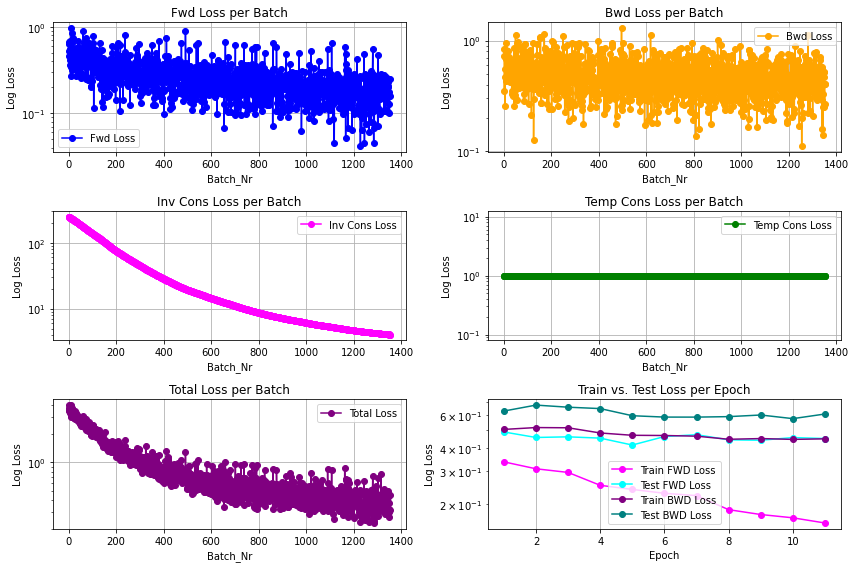

----------Training epoch--------
----------------11---------------

---------------Batch Nr. 1353-------------------
Total Loss: 0.25460362434387207
FwdLoss: 0.09275077283382416
BwdLoss: 0.573106586933136
Inv_Cons_Loss: 4.045053482055664
Temp_Cons_Loss: 9.999999717180685e-10
---------------Batch Nr. 1354-------------------
Total Loss: 0.3112735450267792
FwdLoss: 0.15406468510627747
BwdLoss: 0.4265437424182892
Inv_Cons_Loss: 4.041174411773682
Temp_Cons_Loss: 9.999999717180685e-10
---------------Batch Nr. 1355-------------------
Total Loss: 0.25033846497535706
FwdLoss: 0.07874280214309692
BwdLoss: 0.5124039649963379
Inv_Cons_Loss: 4.036998271942139
Temp_Cons_Loss: 9.999999717180685e-10
---------------Batch Nr. 1356-------------------
Total Loss: 0.34967541694641113
FwdLoss: 0.14177286624908447
BwdLoss: 0.7886545062065125
Inv_Cons_Loss: 4.032619476318359
Temp_Cons_Loss: 9.999999717180685e-10
---------------Batch Nr. 1357-------------------
Total Loss: 0.42638349533081055
FwdLoss: 0.118582

In [24]:
# Run training loop
ko.train(TestingKoop, train_dataloader, test_dataloader, 
         lr= 0.001, learning_rate_change=0.8, loss_weights=[1,0.1,0.01,1],
         enable_AE_loss = True,
         num_epochs=30, decayEpochs=[3, 6, 9, 12, 15, 18, 21, 24, 27],
         weight_decay=0.001, gradclip=1, max_Kstep=1,
         print_batch_info=True, model_name='TestingKoop30M_augm')
